# Peak Finder

To use: 
1. copy `isotonic_regression_l1_total_order.py` and `peak_finder.py` into your folder
2. do `from peak_finder import peak_finder`
3. OPTION 1, do `peak_finder(y,n_peaks)` where `y` is the signal where you want to find peaks, and `n_peaks` is an approximate of the number of peaks
3. OPTION 2, do `peak_finder_auto(y)` where `y` is the signal where you want to find peaks. Peak is automatically selected.


Return values:
`S,x,opt = peak_finder(y,n_peaks)`
1. `S` indices of the peaks
2. `x` an approximation to `y` with only peaks at `S`
3. `opt = np.sum(np.abs(x-y))`


In [11]:
from peak_finder import peak_finder, peak_finder_auto
from toy_examples import sin_waves, mountains_and_plateau
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
y_examples = [sin_waves(n_peaks=1),sin_waves(n_peaks=2),sin_waves(n_peaks=3), mountains_and_plateau()]
y_names = ["1peak", "2peaks","3peaks", "plateau"]
n_peaks_true = [1,2,3,3]

## Automatically detect the number of peaks

In [13]:
S_all = []
x_all = []
opt_all = []
start = time.time()

for i,y in enumerate(y_examples):
    S,x,opt = peak_finder_auto(y)
    S_all.append(S)
    x_all.append(x)
    opt_all.append(opt)
end = time.time()
run_time = (end-start)

Text(0.5, 0.98, 'Auto-mode, run time (sec) = 4.57')

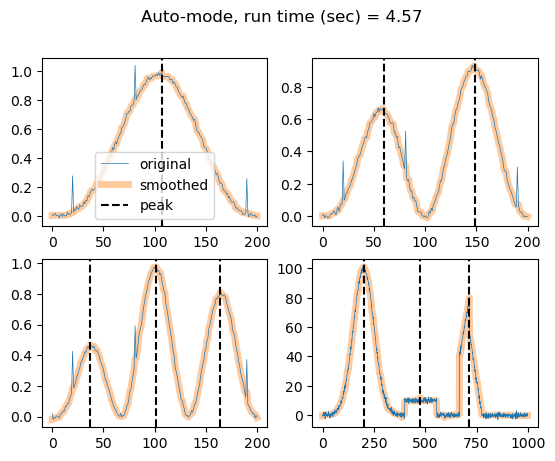

In [14]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i,y in enumerate(y_examples):
    x = x_all[i]
    S = S_all[i]
    ax = axes[i]
    ax.plot(y, label='original',linewidth=0.5,zorder=2)
    ax.plot(x, label="smoothed",linewidth=5,zorder=-1,alpha=0.4)


    for j in S:
        ax.axvline(x=j,color='black', linestyle="--", label='peaks')
    if i == 0:
        ax.legend()
fig.suptitle(f"Auto-mode, run time (sec) = {np.round(run_time,2)}")


## Setting the number of peaks manually speed things up

In [15]:
S_all = []
x_all = []
opt_all = []
start = time.time()

for i,y in enumerate(y_examples):
    n_peaks = n_peaks_true[i]
    S,x,opt = peak_finder(y,n_peaks)
    S_all.append(S)
    x_all.append(x)
    opt_all.append(opt)
end = time.time()
run_time = (end-start)

Text(0.5, 0.98, 'Manual-mode, run time (sec) = 1.18')

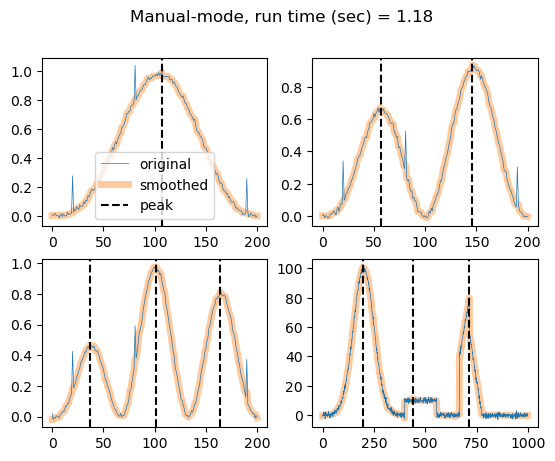

In [16]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i,y in enumerate(y_examples):
    x = x_all[i]
    S = S_all[i]
    ax = axes[i]
    ax.plot(y, label='original',linewidth=0.5,zorder=2)
    ax.plot(x, label="smoothed",linewidth=5,zorder=-1,alpha=0.4)


    for j in S:
        ax.axvline(x=j,color='black', linestyle="--", label='peaks')
    if i == 0:
        ax.legend()
fig.suptitle(f"Manual-mode, run time (sec) = {np.round(run_time,2)}")